In [11]:
# 前期准备：
from numpy import inf
from pandas import read_csv
from AnalysisFuncs import *
from platform import system
from IPython.display import display
from IPython.display import HTML
from IPython.core import display as di
from matplotlib import pyplot as plt
%matplotlib inline

# 1、基础设置：
# （1）设置作图尺寸大小：
plt.rcParams['figure.dpi'] = 100
# （2）设置导出HTML时是否隐藏代码：
hide_code = True  # 设置是否隐藏代码。
if hide_code:
    di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)
    CSS = """#notebook div.output_subarea {max-width:100%;}""" #changes output_subarea width to 100% (from 100% - 14ex)
    HTML('<style>{}</style>'.format(CSS))

# 2、问题解决：
# （1）解决matplotlib作图时中文乱码问题：
sysName = system()
if sysName == 'Windows':
    plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
    plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
elif sysName == 'Darwin':
    plt.rcParams['font.sans-serif']=['Arial Unicode MS']
    plt.rcParams['axes.unicode_minus'] = False #解决保存图像是负号'-'显示为方块的问题



# 数据读入：
filePath =r'Data/2013数据录入.csv'
df = read_csv(filePath, na_values=' ', dtype='float64')

## 一、单一变量数据统计：

### （一）所有三点血糖低于5的数量和占比：

In [12]:
df3AM0to5, dfPlot3AM0to5 = GetRates(df, colKey='三点', low=0, high=5)
df3AM0to5

{}


KeyError: '[True True True True True True True True True False True True True True\n True True True False True True True True True True True False True True\n True True True True True False True True True True True True True False\n True True True True True True True False True True True True True True\n True False True True True True True True True False True True True True\n True True True False True True True True True True True False True True\n True True True True True False True True True True True True True False\n True True True True True True True False True True True True True True\n True False True True True True True True True False True True True True\n True True True False True True True True True True True False True True\n True True True True True False True True True True True True] not found in axis'

### （二）所有睡前血糖低于5的数量和占比：

In [6]:
dfBeforeSleep0to5, dfPlotBeforeSleep0to5 = GetRates(df, colKey='睡前' , low=0, high=5)
dfBeforeSleep0to5

,0.0≤睡前<5.0,睡前总记录,占比（%）
V1睡前,2,103,1.94
V2睡前,2,98,2.04
V3睡前,2,96,2.08
V4睡前,5,98,5.10
V5睡前,5,95,5.26
V6睡前,2,89,2.25
V7睡前,3,90,3.33
V8睡前,1,76,1.32
V9睡前,3,67,4.48
V10睡前,1,62,1.61


### （三）所有睡前血糖在5到7之间的数量和占比：

In [24]:
dfBeforeSleep5to7, dfPlotBeforeSleep5to7 = GetRates(df, keywords='睡前' , low=5, high=7)
dfBeforeSleep5to7

,睡前总记录,5.0≤睡前<7.0,占比(%)
V1睡前,103,20,19.42
V2睡前,98,18,18.37
V3睡前,96,22,22.92
V4睡前,98,31,31.63
V5睡前,95,23,24.21
V6睡前,89,14,15.73
V7睡前,90,23,25.56
V8睡前,76,24,31.58
V9睡前,67,20,29.85
V10睡前,62,21,33.87


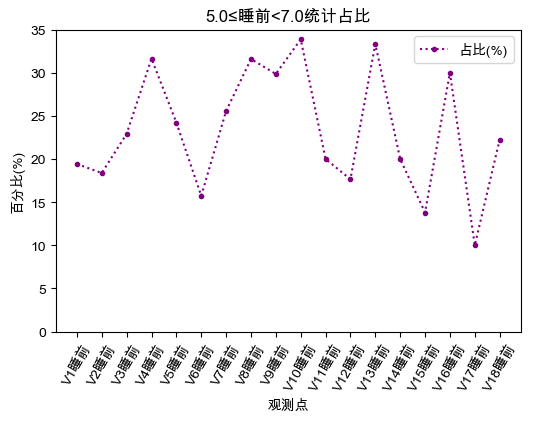

In [25]:
# 作图
DrawPicRate(dfPlotBeforeSleep5to7)

### （四）所有空腹血糖小于5的数量和占比：

In [26]:
dfBeforeMeal0to5, dfPlotBeforeMeal0to5 = GetRates(df, keywords='空腹' , low=0, high=5)
dfBeforeMeal0to5

,空腹总记录,0.0≤空腹<5.0,占比(%)
V1空腹,8,0,0.00
V2空腹,102,7,6.86
V3空腹,101,5,4.95
V4空腹,100,6,6.00
V5空腹,101,8,7.92
V6空腹,98,5,5.10
V7空腹,92,4,4.35
V8空腹,94,5,5.32
V9空腹,84,4,4.76
V10空腹,74,4,5.41


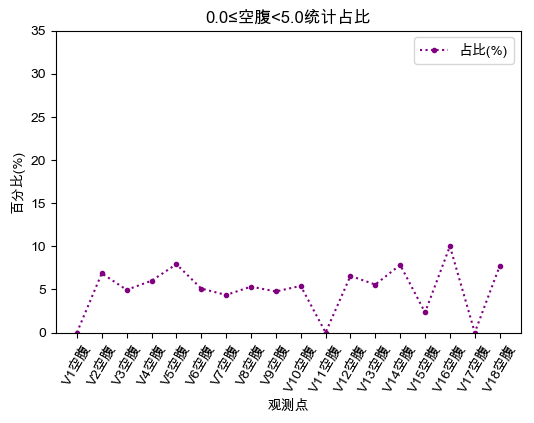

In [27]:
# 作图
DrawPicRate(dfPlotBeforeMeal0to5)

## 二、分组对比研究：

  设每晚睡前至次日晚餐后的时间段为一组，共17个组。

### (一) 睡前血糖介于[0.0, 5.0)对三点血糖的影响数据：

In [28]:
dfRelative3AM, _ = GetRelativeRate(df, xlow=0, xhigh=5, ylow=0, yhigh=5, group='三点')
dfRelative3AM

,0.0≤三点血糖<5.0,同时0.0≤睡前血糖<5.0,占比(%)
Group01,6,0,0.00
Group02,8,0,0.00
Group03,6,0,0.00
Group04,3,0,0.00
Group05,2,0,0.00
Group06,8,2,25.00
Group07,10,0,0.00
Group08,10,0,0.00
Group09,7,0,0.00
Group10,8,0,0.00


### (二) 睡前血糖介于[5.0, 7.0)对空腹值介于[0.0, 7.0)的影响

In [29]:
dfRelativeBeforeMeal, _ = GetRelativeRate(df, xlow=5, xhigh=7, ylow=0, yhigh=7, group='空腹')
dfRelativeBeforeMeal

,0.0≤空腹血糖<7.0,同时5.0≤睡前血糖<7.0,占比(%)
Group01,54,16,29.63
Group02,56,14,25.00
Group03,62,17,27.42
Group04,65,20,30.77
Group05,65,17,26.15
Group06,62,13,20.97
Group07,61,19,31.15
Group08,54,16,29.63
Group09,44,13,29.55
Group10,45,12,26.67


### (三)睡前血糖小于5时，三点和空腹血糖的平均值

In [30]:
GetRelativeMean(df, 0, 5, groups=['三点', '空腹'])

,0.0≤睡前血糖<5.0数量,三点血糖平均值,空腹血糖平均值
Group01,2,5.45,7.75
Group02,1,7.30,5.60
Group03,2,6.80,6.15
Group04,4,7.00,6.63
Group05,5,7.92,7.98
Group06,2,4.85,4.80
Group07,3,6.17,5.40
Group08,1,6.20,4.00
Group09,3,7.37,5.20
Group10,1,5.10,5.50


### (四)睡前血糖介于[5.0, 7.0)时，三点和空腹血糖的平均值

In [31]:
GetRelativeMean(df, 5, 7, groups=['三点', '空腹'])

,5.0≤睡前血糖<7.0数量,三点血糖平均值,空腹血糖平均值
Group01,20,5.76,5.93
Group02,18,6.16,5.94
Group03,20,6.20,5.81
Group04,31,6.50,6.17
Group05,22,6.59,6.60
Group06,13,5.63,6.09
Group07,21,5.65,5.92
Group08,22,6.53,6.50
Group09,18,6.26,6.40
Group10,20,6.21,6.45


### (五)睡前血糖大于7.0时，三点和空腹血糖的平均值

In [32]:
GetRelativeMean(df, 7, inf, groups=['三点', '空腹'])

,7.0≤睡前血糖<inf数量,三点血糖平均值,空腹血糖平均值
Group01,74,8.00,7.56
Group02,74,7.34,7.26
Group03,67,7.51,7.26
Group04,60,7.19,6.98
Group05,67,7.06,6.79
Group06,70,7.27,7.00
Group07,58,7.10,7.07
Group08,46,6.54,6.71
Group09,41,7.54,7.13
Group10,40,7.00,7.16
